Изначальный файл:

In [1]:
import IPython.display as ipd
#Strummed Acoustic 04_mono
ipd.Audio(r'c:\users\solov\Downloads\Strummed Acoustic 04_mono.wav') # load a local WAV file

Преобразование файла:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Чтение данных из файла
# f_d - частота дискретизации
f_d, sound = wavfile.read(r'c:\users\solov\Downloads\Strummed Acoustic 04_mono.wav')

print("Discretization frequency f_d = {} Hz".format(f_d))
print(max(sound))

# преобразование звука??
filtered_sound = sound

# Сохранение звука в файл
wavfile.write(r'c:\users\solov\Downloads\write_test.wav', f_d, np.array(filtered_sound, dtype="int16"))

Discretization frequency f_d = 44100 Hz
16362


Полученный файл:

In [3]:
ipd.Audio(r'c:\users\solov\Downloads\write_test.wav')

Графики амплитуды и частоты:

In [4]:
import librosa
x, sr = librosa.load(r'c:\users\solov\Downloads\write_test.wav')

[-0.00029693  0.00031116 -0.00031516 ... -0.00014616 -0.00020036
  0.        ]


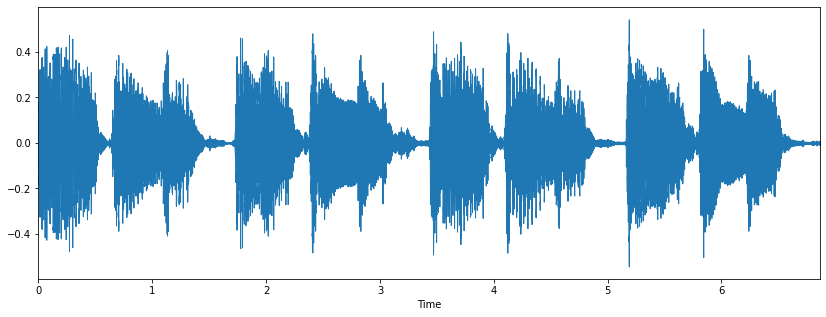

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)
print(x)

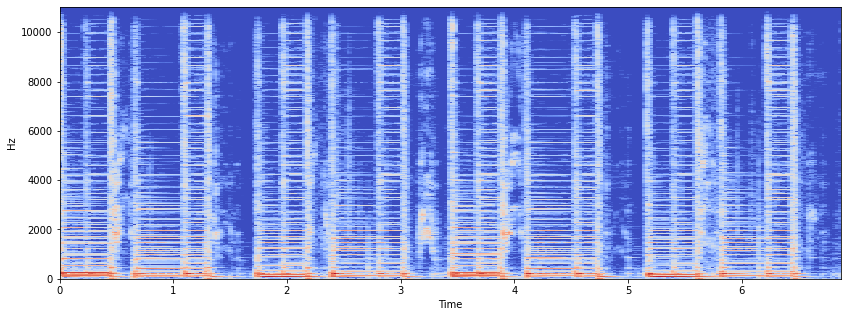

In [7]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

Генерация чистого тона модуляцией амплитуды:

In [21]:
import numpy as np
import IPython.display as ipd
sr = 22050 # sample rate
T = 5.0    # seconds
freq = 196
t = np.linspace(0, T, int(T*sr), endpoint=False) # linspace returns evenly spaced numbers
x = np.sin(2*np.pi*freq*t)
print(len(x))

#interrupted sin
n=1
z=x
for i in range(int(sr*T)):
    if n*sr<i and i<(n+1)*sr:
        z[i] = 0
    if i>(n+1)*sr:
        n=n+2
        
ipd.Audio(z, rate=sr)

110250


Аккорд G:

In [9]:
import soundfile
y = np.sin(2*np.pi*freq*t) + np.sin(2*np.pi*2*freq*t) + np.sin(2*np.pi*3*freq*t)
wavfile.write(r'c:\users\solov\Downloads\write_test_G.wav', sr, np.array(y))
ipd.Audio(y, rate=sr)
soundfile.write(r'c:\users\solov\Downloads\write_test_G.wav', y, sr)

[ 0.          0.33405918  0.66188408 ... -0.97738907 -0.66188408
 -0.33405918]


c:\users\solov\appdata\local\programs\python\python39\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
c:\users\solov\appdata\local\programs\python\python39\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
c:\users\solov\appdata\local\programs\python\python39\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


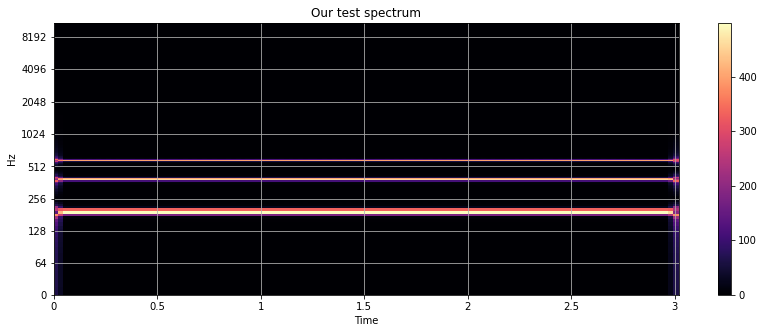

In [10]:
print(y)
Y = librosa.stft(y)
#Ydb = librosa.amplitude_to_db(abs(Y))
plt.figure(figsize=(14, 5))
plt.title("Our test spectrum")
librosa.display.specshow(abs(Y), sr=sr, x_axis='time', y_axis='log')
plt.colorbar()
plt.grid()
plt.show()

In [30]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import sounddevice as sd
sd.query_devices()
sd.default.samplerate = 44100

def callback(indata, outdata, frames, time, status):
    if status:
        print(status)
    outdata[:] = audio_data
    
    
duration = 10
sd.Stream(channels = 2,  dtype="int16", callback = callback)
print(data.read_available)
sd.stop()


PortAudioError: Error opening Stream: Invalid number of channels [PaErrorCode -9998]